<a href="https://colab.research.google.com/github/amar-naik/EAP/blob/master/Week3/ASSG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

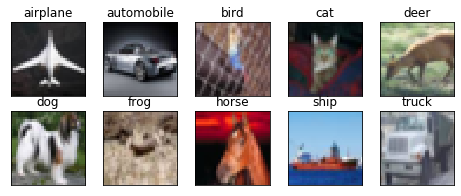

In [15]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [19]:
# Define the model (inital model)
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 22s 57ms/step - loss: 1.8431 - acc: 0.2945 - val_loss: 1.3921 - val_acc: 0.4876
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3273 - acc: 0.5221 - val_loss: 1.1181 - val_acc: 0.6019
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 1.0981 - acc: 0.6122 - val_loss: 0.9890 - val_acc: 0.6546
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9567 - acc: 0.6659 - val_loss: 0.8598 - val_acc: 0.7030
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 0.8632 - acc: 0.7018 - val_loss: 0.7547 - val_acc: 0.7361
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7840 - acc: 0.7311 - val_loss: 0.7359 - val_acc: 0.7463
Epoch 7/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7304 - acc: 0.7515 - val_loss: 0.6665 - val_acc: 0.7717
Epoch 8/50
390/390 [==============================] - 20s 52ms

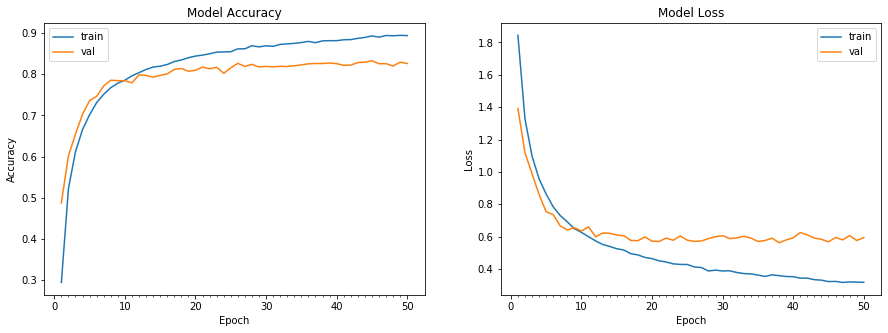

Accuracy on test data is: 82.62


In [21]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [22]:
model = Sequential()
model.add(SeparableConv2D(30, kernel_size=(3,3), input_shape=(32, 32, 3), activation = 'relu')) #32X32X30 ,RF=3X3
model.add(BatchNormalization())

model.add(SeparableConv2D(48, kernel_size=(3,3), activation = 'relu')) #30X30X48 ,RF=5X5
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #15X15X48 ,RF=6X6
model.add(Dropout(0.25))

model.add(SeparableConv2D(96, kernel_size=(3,3), border_mode='same', activation = 'relu')) #15X15X96 ,RF=10X10
model.add(BatchNormalization())


model.add(SeparableConv2D(96, kernel_size=(3,3), border_mode='same', activation = 'relu')) #13X13X96 ,RF=14X14
model.add(BatchNormalization())

model.add(SeparableConv2D(96, kernel_size=(3,3), activation = 'relu')) #11X11X96 ,RF=18X18
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2))) #5X5X96 ,RF=20x20
model.add(Dropout(0.25))

model.add(SeparableConv2D(192, kernel_size=(3,3), activation = 'relu', border_mode='same')) #5X5X192 ,RF=28x28
model.add(BatchNormalization())

model.add(SeparableConv2D(225, kernel_size=(3,3), activation = 'relu')) #3X3X225 ,RF=36x36
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #1X1X225 ,RF=40x40
model.add(Dropout(0.25))

model.add(SeparableConv2D(num_classes,kernel_size=(2,2), activation = 'relu')) #1X1X10 ,RF=56x56
model.add(Flatten())

model.add(Activation('softmax'))

# Compile the model
#model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, kernel_size=(3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, kernel_size=(3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, kernel_size=(3, 3), activation="relu", padding="same")`


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_17 (Separab (None, 30, 30, 30)        147       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 30)        120       
_________________________________________________________________
separable_conv2d_18 (Separab (None, 28, 28, 48)        1758      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 48)        192       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 48)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 48)        0         
_________________________________________________________________
separable_conv2d_19 (Separab (None, 14, 14, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
195/195 [==============================] - 28s 143ms/step - loss: 1.5429 - acc: 0.4537 - val_loss: 1.5794 - val_acc: 0.4771
Epoch 2/50
195/195 [==============================] - 24s 125ms/step - loss: 1.0520 - acc: 0.6259 - val_loss: 1.0471 - val_acc: 0.6360
Epoch 3/50
195/195 [==============================] - 24s 125ms/step - loss: 0.9099 - acc: 0.6796 - val_loss: 0.8903 - val_acc: 0.6876
Epoch 4/50
195/195 [==============================] - 24s 125ms/step - loss: 0.8211 - acc: 0.7125 - val_loss: 0.9371 - val_acc: 0.6804
Epoch 5/50
195/195 [==============================] - 24s 124ms/step - loss: 0.7550 - acc: 0.7358 - val_loss: 0.8131 - val_acc: 0.7303
Epoch 6/50
195/195 [==============================] - 24s 125ms/step - loss: 0.7041 - acc: 0.7530 - val_loss: 0.7531 - val_acc: 0.7405
Epoch 7/50
195/195 [==============================] - 24s 124ms/step - loss: 0.6678 - acc: 0.7662 - val_loss: 0.6864 - val_acc: 0.7602
Epoch 8/50
195/195 [==============================] - 2

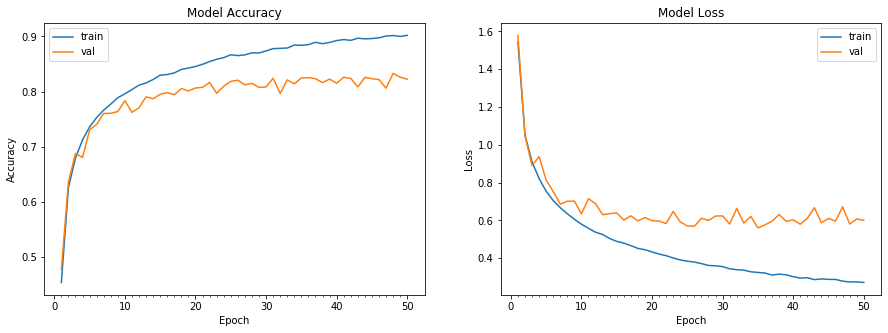

Accuracy on test data is: 82.24


In [23]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))